<a href="https://colab.research.google.com/github/leoliu-ut/Leo_Production/blob/master/Data_Visualization_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving BusinessAnalyst.csv to BusinessAnalyst.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import io
  
df = pd.read_csv(io.BytesIO(uploaded['BusinessAnalyst.csv'])) 

# **Dataset Snapshot**

In [ ]:
df.head(2)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True


In [ ]:
df.count()

Unnamed: 0           4092
index                4092
Job Title            4092
Salary Estimate      4092
Job Description      4092
Rating               4092
Company Name         4092
Location             4092
Headquarters         4092
Size                 4092
Founded              4092
Type of ownership    4092
Industry             4092
Sector               4092
Revenue              4092
Competitors          3692
Easy Apply           3692
dtype: int64

# **Data Cleaning**

**Delete enetries with missing values**

In [ ]:
data=df.dropna()

In [ ]:
data.count()

Unnamed: 0           3692
index                3692
Job Title            3692
Salary Estimate      3692
Job Description      3692
Rating               3692
Company Name         3692
Location             3692
Headquarters         3692
Size                 3692
Founded              3692
Type of ownership    3692
Industry             3692
Sector               3692
Revenue              3692
Competitors          3692
Easy Apply           3692
dtype: int64

**Check values of each column**

In [ ]:
data['index'].value_counts()

3740    1
1003    1
757     1
2224    1
4191    1
       ..
1198    1
536     1
2040    1
3577    1
732     1
Name: index, Length: 3692, dtype: int64

In [ ]:
data['Job Title'].value_counts()

Business Analyst                                 502
Data Analyst                                     145
Business Systems Analyst                         118
Senior Business Analyst                           68
Business Intelligence Analyst                     50
                                                ... 
Global Capital Markets Summer Analyst Program      1
Director of Business Analysis                      1
Applications Support Analyst                       1
Cloud Business Analyst                             1
Business Analyst ll Manager                        1
Name: Job Title, Length: 1865, dtype: int64

In [ ]:
data['Salary Estimate'].value_counts()

$41K-$79K (Glassdoor est.)     60
$48K-$87K (Glassdoor est.)     60
$43K-$78K (Glassdoor est.)     60
$41K-$80K (Glassdoor est.)     59
$43K-$84K (Glassdoor est.)     53
                               ..
$58K-$68K (Glassdoor est.)     13
$69K-$138K (Glassdoor est.)    12
$51K-$95K (Glassdoor est.)     10
$66K-$124K (Glassdoor est.)     3
$59K-$98K (Glassdoor est.)      1
Name: Salary Estimate, Length: 138, dtype: int64

In [ ]:
data['Rating'].value_counts()

-1.0    318
3.7     264
3.6     248
5.0     245
3.5     243
3.9     230
3.8     218
4.0     201
3.4     192
3.3     161
4.1     157
3.1     131
3.2     129
4.2     119
3.0      92
4.4      91
4.5      84
4.3      83
4.6      69
2.9      53
4.7      51
2.5      49
2.8      47
2.6      44
4.8      42
4.9      36
2.7      30
2.0      17
1.0      14
2.4      10
2.2      10
2.3       7
2.1       5
1.9       1
1.7       1
Name: Rating, dtype: int64

In [ ]:
data['Rating'] = data['Rating'].replace('-1.0',np.nan)
data['Rating'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3.7    264
3.6    248
5.0    245
3.5    243
3.9    230
3.8    218
4.0    201
3.4    192
3.3    161
4.1    157
3.1    131
3.2    129
4.2    119
3.0     92
4.4     91
4.5     84
4.3     83
4.6     69
2.9     53
4.7     51
2.5     49
2.8     47
2.6     44
4.8     42
4.9     36
2.7     30
2.0     17
1.0     14
2.4     10
2.2     10
2.3      7
2.1      5
1.9      1
1.7      1
Name: Rating, dtype: int64

In [ ]:
data['Location'].value_counts()

San Diego, CA      348
Houston, TX        340
Austin, TX         331
San Antonio, TX    325
Chicago, IL        268
                  ... 
Rego Park, NY        1
Paramus, NJ          1
Ambler, PA           1
Trevose, PA          1
El Monte, CA         1
Name: Location, Length: 209, dtype: int64

In [ ]:
data['Size'].value_counts()

10000+ employees           717
51 to 200 employees        709
1001 to 5000 employees     650
1 to 50 employees          474
201 to 500 employees       375
501 to 1000 employees      288
5001 to 10000 employees    206
-1                         187
Unknown                     86
Name: Size, dtype: int64

In [ ]:
data['Size']=data['Size'].replace('-1',np.nan)
data['Size'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10000+ employees           717
51 to 200 employees        709
1001 to 5000 employees     650
1 to 50 employees          474
201 to 500 employees       375
501 to 1000 employees      288
5001 to 10000 employees    206
Unknown                     86
Name: Size, dtype: int64

In [ ]:
data['Founded'].value_counts()

-1      947
2008    193
1999    105
2002    105
1998     99
       ... 
1893      1
1895      1
1892      1
1938      1
1882      1
Name: Founded, Length: 176, dtype: int64

In [ ]:
data['Founded']=data['Founded'].replace('-1',np.nan)
data['Founded'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2008    193
1999    105
2002    105
1998     99
2000     96
       ... 
1832      1
1875      1
1849      1
1943      1
1882      1
Name: Founded, Length: 175, dtype: int64

In [ ]:
data['Type of ownership'].value_counts()

Company - Private                 2081
Company - Public                   922
-1                                 187
Subsidiary or Business Segment     167
Nonprofit Organization              88
Government                          84
Unknown                             43
College / University                41
Contract                            26
Hospital                            15
Other Organization                  13
Private Practice / Firm             11
School / School District             9
Self-employed                        4
Franchise                            1
Name: Type of ownership, dtype: int64

In [ ]:
data['Type of ownership']=data['Type of ownership'].replace('-1',np.nan)
data['Type of ownership'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Company - Private                 2081
Company - Public                   922
Subsidiary or Business Segment     167
Nonprofit Organization              88
Government                          84
Unknown                             43
College / University                41
Contract                            26
Hospital                            15
Other Organization                  13
Private Practice / Firm             11
School / School District             9
Self-employed                        4
Franchise                            1
Name: Type of ownership, dtype: int64

In [ ]:
data['Industry'].value_counts()

IT Services                     620
-1                              465
Staffing & Outsourcing          440
Computer Hardware & Software    236
Consulting                      223
                               ... 
Grantmaking Foundations           1
Religious Organizations           1
News Outlet                       1
Security Services                 1
Funeral Services                  1
Name: Industry, Length: 97, dtype: int64

In [ ]:
data['Industry']=data['Industry'].replace('-1',np.nan)
data['Industry'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IT Services                         620
Staffing & Outsourcing              440
Computer Hardware & Software        236
Consulting                          223
Health Care Services & Hospitals    136
                                   ... 
News Outlet                           1
Mining                                1
Travel Agencies                       1
Consumer Product Rental               1
Funeral Services                      1
Name: Industry, Length: 96, dtype: int64

In [ ]:
data['Revenue'].value_counts()

Unknown / Non-Applicable            864
$10+ billion (USD)                  410
$100 to $500 million (USD)          381
$50 to $100 million (USD)           354
$2 to $5 billion (USD)              236
$10 to $25 million (USD)            235
$25 to $50 million (USD)            190
-1                                  187
$1 to $5 million (USD)              170
$1 to $2 billion (USD)              169
$500 million to $1 billion (USD)    131
$5 to $10 billion (USD)             129
$5 to $10 million (USD)             124
Less than $1 million (USD)          112
Name: Revenue, dtype: int64

In [ ]:
data['Revenue']=data['Revenue'].replace('-1',np.nan)
data['Revenue'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unknown / Non-Applicable            864
$10+ billion (USD)                  410
$100 to $500 million (USD)          381
$50 to $100 million (USD)           354
$2 to $5 billion (USD)              236
$10 to $25 million (USD)            235
$25 to $50 million (USD)            190
$1 to $5 million (USD)              170
$1 to $2 billion (USD)              169
$500 million to $1 billion (USD)    131
$5 to $10 billion (USD)             129
$5 to $10 million (USD)             124
Less than $1 million (USD)          112
Name: Revenue, dtype: int64

In [ ]:
data['Easy Apply'].value_counts()

-1      3559
True     133
Name: Easy Apply, dtype: int64

In [ ]:
data['Easy Apply']=data['Easy Apply'].replace('-1','False')
data['Easy Apply'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False    3559
True      133
Name: Easy Apply, dtype: int64

**Clean all NaN to get a cleaner dataset**

In [ ]:
dataclean=data.dropna()

In [ ]:
dataclean.count()

Unnamed: 0           2711
index                2711
Job Title            2711
Salary Estimate      2711
Job Description      2711
Rating               2711
Company Name         2711
Location             2711
Headquarters         2711
Size                 2711
Founded              2711
Type of ownership    2711
Industry             2711
Sector               2711
Revenue              2711
Competitors          2711
Easy Apply           2711
dtype: int64

# **Feature Engineer**

*1. Split salary to minSalary and maxSalary*

In [ ]:
dataclean['usefulSalary'],dataclean['trash']=dataclean['Salary Estimate'].str.split('(').str
dataclean['minSalary'],dataclean['maxSalary']=dataclean['usefulSalary'].str.split('-').str
dataclean['minSalary']=dataclean['minSalary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
dataclean['maxSalary']=dataclean['maxSalary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
dataclean.head(2)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,usefulSalary,trash,minSalary,maxSalary
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",False,$56K-$102K,Glassdoor est.),56,102
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,False,$56K-$102K,Glassdoor est.),56,102


*2. Split Location*

In [ ]:
dataclean['Location'] = dataclean['Location'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataclean['City'] = dataclean['Location'].apply(lambda x:x.split(',')[0])
dataclean['State'] = dataclean['Location'].apply(lambda x: x.split(' ')[-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataclean.head(2)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,usefulSalary,trash,minSalary,maxSalary,City,State
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",False,$56K-$102K,Glassdoor est.),56,102,New York,NY
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,False,$56K-$102K,Glassdoor est.),56,102,Florham Park,NJ


# ***Data visualization***

***1. Some distributions***

*Salary distribution*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



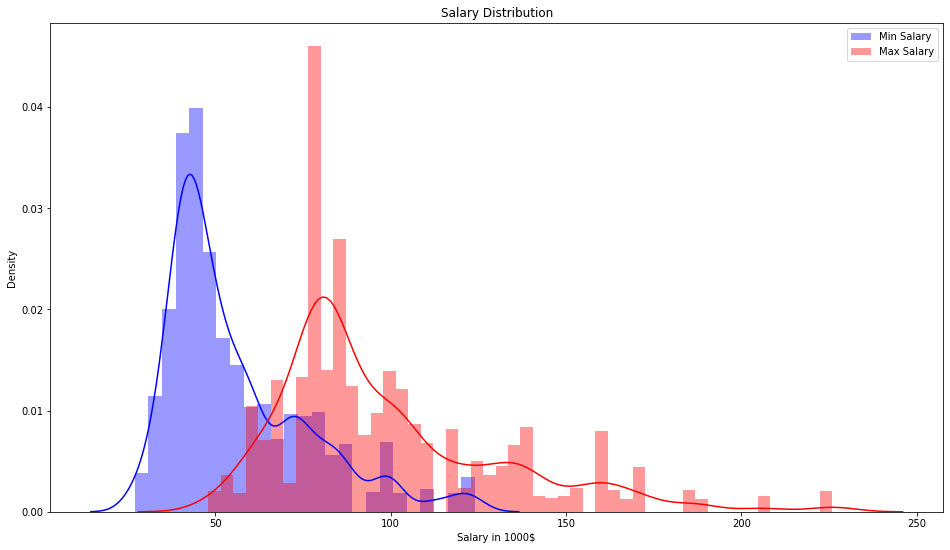

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(a=dataclean['minSalary'], label='Min Salary', color='blue')
sns.distplot(a=dataclean['maxSalary'], bins=50, axlabel='Salary in 1000$', label='Max Salary', color='red').set_title('Salary Distribution')
plt.legend()
plt.show()

*Rating Distribution*

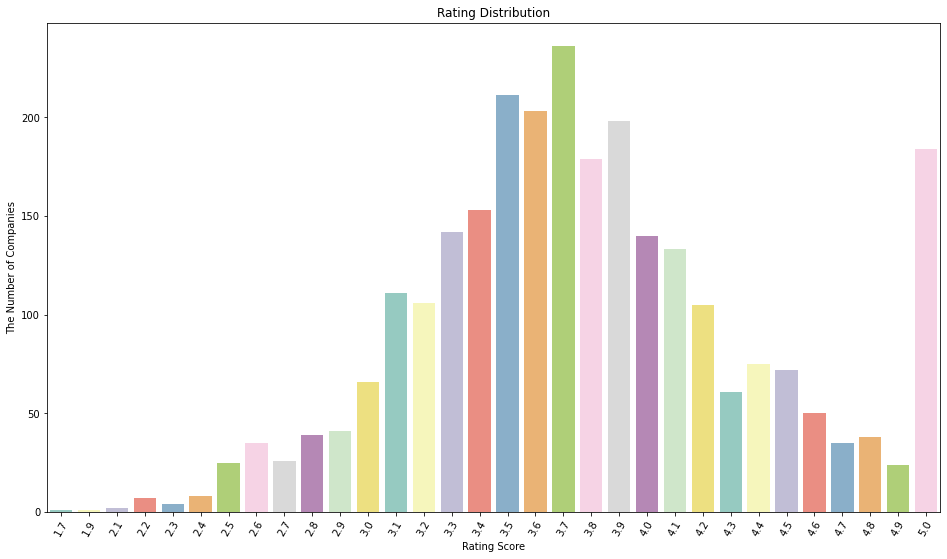

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x="Rating", data=dataclean.sort_values('Rating'), palette='Set3')
ax.set(title='Rating Distribution', ylabel='The Number of Companies', xlabel='Rating Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='center', fontweight='light')
plt.show()

*Company distribution in states*

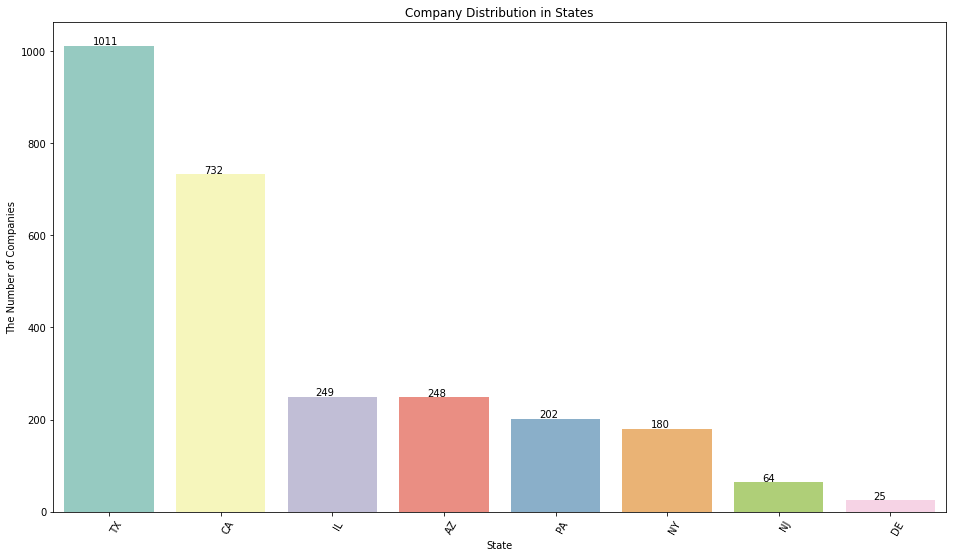

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x='State', data=dataclean, palette='Set3', order=dataclean['State'].value_counts().index)
ax.set(title='Company Distribution in States', ylabel='The Number of Companies', xlabel='State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='left', fontweight='light')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+ 3, '%.0f'%(height))
plt.show()

*Company distribution in cities*

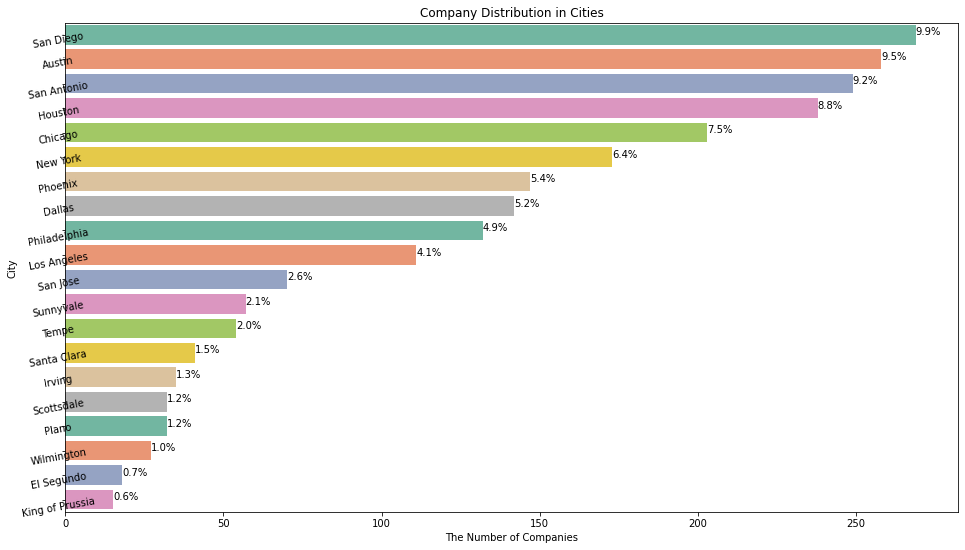

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(y='City', data=dataclean, palette='Set2', order=dataclean['City'].value_counts().iloc[:20].index)

total = len(dataclean['City'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
ax.set(title='Company Distribution in Cities', xlabel='The Number of Companies', ylabel='City')
ax.set_yticklabels(ax.get_yticklabels(), rotation=10, horizontalalignment='center', fontweight='light')
plt.show()

*Employee size distribution*

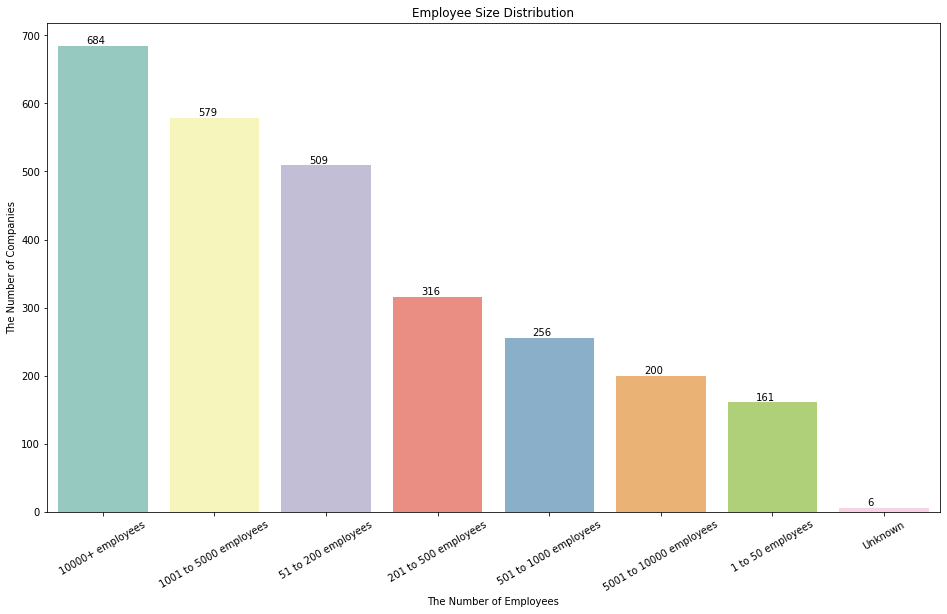

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(data=dataclean,x='Size',palette='Set3',order=dataclean['Size'].value_counts().index)
ax.set(title='Employee Size Distribution', xlabel='The Number of Employees', ylabel='The Number of Companies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center', fontweight='light')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+ 3, '%.0f'%(height))
plt.show()

*Industry distribution*

In [ ]:
labels = dataclean['Industry'].value_counts().index
values = dataclean['Industry'].value_counts().values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

*Industry distribution - a better version*

In [ ]:
#A revised version

import itertools
dic = {}
for Label, Value in zip(labels, values):
    dic[Label] = Value

In [ ]:
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<60) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
values = newdic.values()

<Figure size 1152x1152 with 0 Axes>

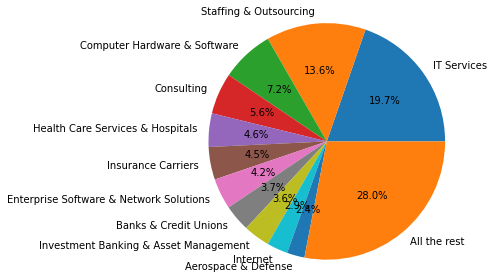

In [ ]:
plt.figure(figsize=(16,16))
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.show()

*Type of ownership distribution*

In [ ]:
labels_owner = dataclean['Type of ownership'].value_counts()[:10].index
values_owner = dataclean['Type of ownership'].value_counts()[:10].values


plt.figure(figsize=(6,6))
layout = go.Layout(
   {
      "title":"Type of Ownership",
   }
)
#fig = go.Figure(data=[go.Pie(labels=labels_owner, values=values_owner)], layout=layout)

data2 = {
   "values": values_owner,
   "labels": labels_owner,
   "hoverinfo":"label+percent+name",
   "hole": .6,
   "type": "pie"
}
import plotly.graph_objs as go
fig = go.Figure(data = data2, layout = layout)

fig.show()

<Figure size 432x432 with 0 Axes>

*Founded year distribution*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



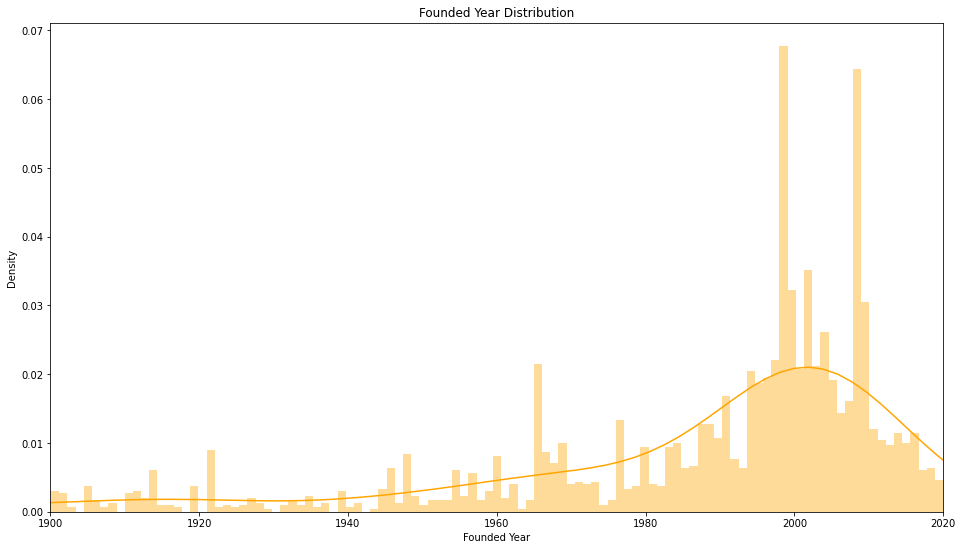

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(a=dataclean['Founded'], bins=300, axlabel='Founded Year',color='orange').set_title('Founded Year Distribution')   
plt.xlim(1900,2020)

plt.show()

**2. Other findings**

*Average minimum and maximum salaries in different industries*

In [ ]:
data3=dataclean.groupby('Industry')[['minSalary','maxSalary']].mean().rename(columns={'avgMinSalary':'Avg_min_salary','avgMinSalary':'Avg_max_salary'})
data3=data3.reset_index()
data3.head(2)


,Industry,minSalary,maxSalary
0,Accounting,50.956522,88.608696
1,Advertising & Marketing,55.409091,100.477273


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data3.Industry,y=data3['minSalary'],name='Average Minimum salary', base=-data3['minSalary'], marker_color='orange'))
fig.add_trace(go.Bar(x=data3.Industry,y=data3['maxSalary'],name='Average Maximum Salary', marker_color='blue'))

fig.update_layout(title='Average minimum and maximum salary in different industries',barmode='stack',
    bargap=0.1, # gap between bars of adjacent location coordinates.
    bargroupgap=0.25 # gap between bars of the same location coordinate.
)

fig.show()

*East to apply by industry*

In [ ]:
dataclean['Easy Apply']=='True'

0       False
2       False
3       False
4        True
5       False
        ...  
3685    False
3686    False
3687    False
3688    False
3690    False
Name: Easy Apply, Length: 2711, dtype: bool

In [ ]:
data_easy_apply=dataclean[dataclean['Easy Apply']=='True']
data5=data_easy_apply.groupby('Industry')['Easy Apply'].count().reset_index()
industry_dataclean=data5.sort_values('Easy Apply',ascending=False).head(10)
industry_dataclean

,Industry,Easy Apply
25,Staffing & Outsourcing,31
14,IT Services,17
3,Computer Hardware & Software,11
18,Internet,9
4,Consulting,8
9,Federal Agencies,4
21,Logistics & Supply Chain,4
13,Health Care Services & Hospitals,4
0,Advertising & Marketing,3
8,Enterprise Software & Network Solutions,3


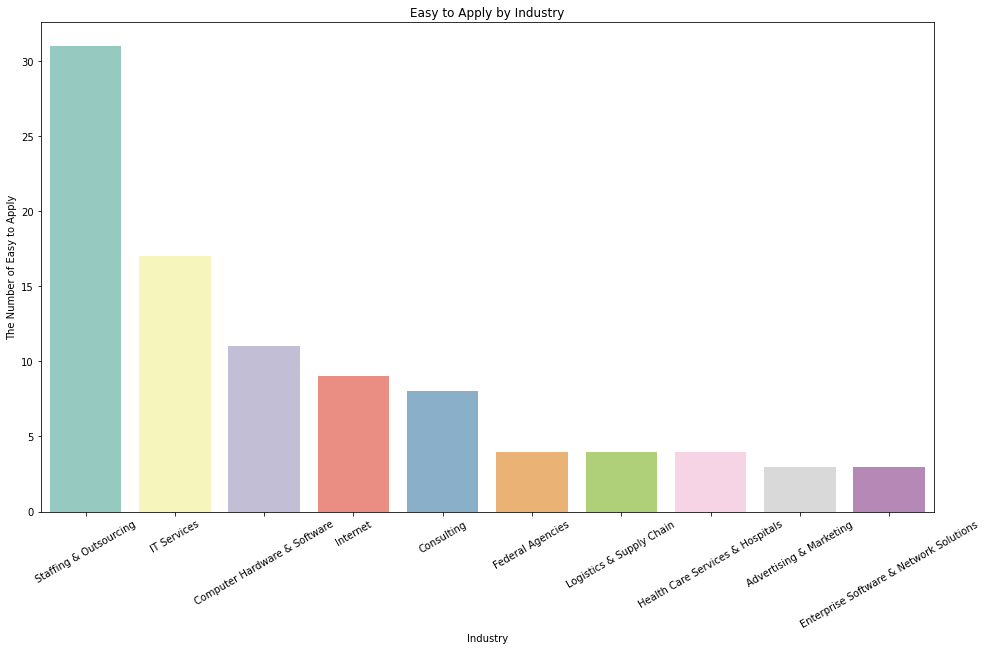

In [ ]:
plt.figure(figsize=(16,9))
ax=sns.barplot(data=industry_dataclean,x='Industry', y='Easy Apply', palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center', fontweight='light')
ax.set(title='Easy to Apply by Industry', xlabel='Industry', ylabel='The Number of Easy to Apply')
plt.show()

*Easy to apply by job title*

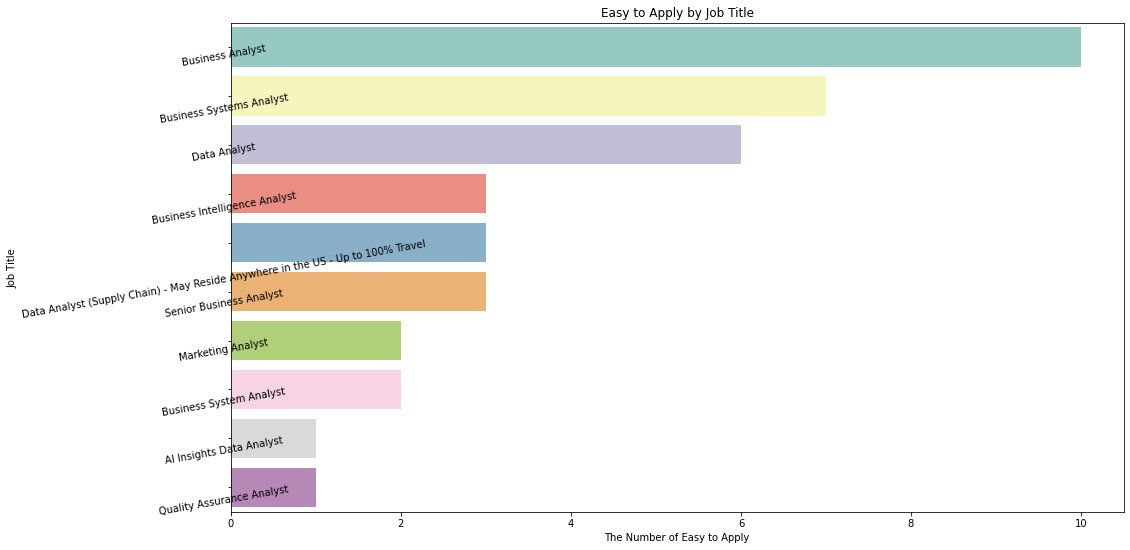

In [ ]:
data_easy_apply=dataclean[dataclean['Easy Apply']=='True']
data6=data_easy_apply.groupby('Job Title')['Easy Apply'].count().reset_index()
job_dataclean=data6.sort_values('Easy Apply',ascending=False).head(10)

plt.figure(figsize=(16,9))
ax=sns.barplot(data=job_dataclean, y='Job Title', x='Easy Apply', palette='Set3')
ax.set_yticklabels(ax.get_yticklabels(), rotation=10, horizontalalignment='center', fontweight='light')
ax.set(title='Easy to Apply by Job Title', ylabel='Job Title', xlabel='The Number of Easy to Apply')
plt.show()

*Revenue by industry*

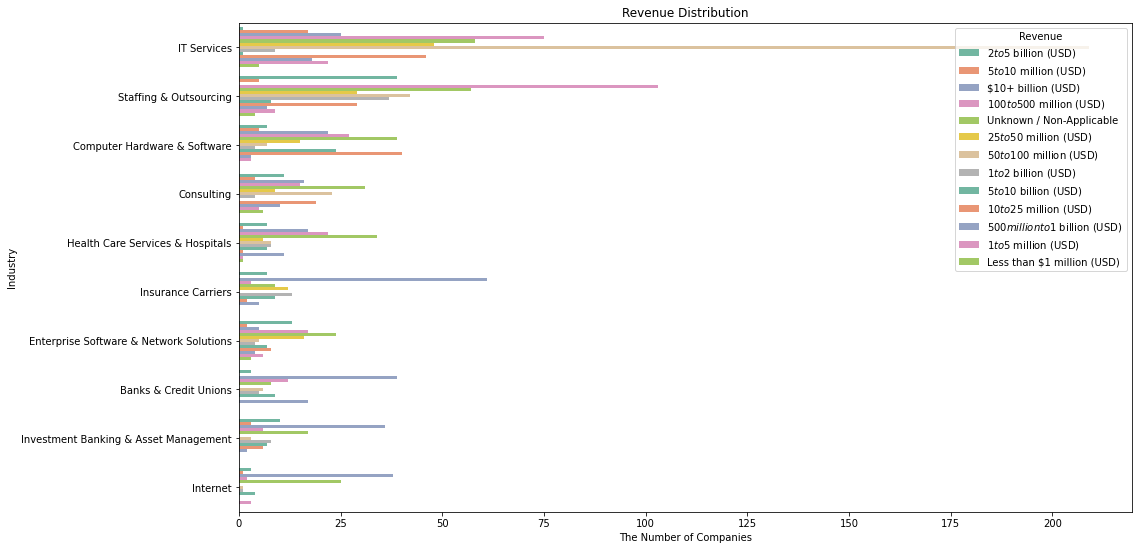

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(data=dataclean,y='Industry',palette='Set2', hue='Revenue',order=dataclean['Industry'].value_counts().iloc[:10].index)
ax.set(title='Revenue Distribution', ylabel='Industry', xlabel='The Number of Companies')
#ax.set_yticklabels(ax.get_yticklabels(), rotation=10, horizontalalignment='center', fontweight='light')
plt.show()